In [1]:
import pandas as pd 
import os
import numpy as np
import matplotlib.pyplot as plt 
from itertools import chain
import seaborn as sns
from collections import Counter
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
yourpath = r"C:\Users\User\Documents\visualizatiion hw\babynames"

In [3]:
directory = list()

for root, dirs, files in os.walk(yourpath, topdown=False):
    for name in files:
        directory.append(os.path.join(root, name))
        ##print(os.path.join(root, name))

directory = directory[1:]

dfc = pd.DataFrame(columns=['Name','Sex','Amount','Year'])

for i in directory:
    df = pd.read_csv(i,names=['Name','Sex','Amount'], delimiter=',' )
    df['Year'] = i
    df['Year'] = df['Year'].map(lambda x: x.lstrip(r'C:\Users\User\Documents\visualizatiion hw\babynames\yob').rstrip('.txt'))
    dfc = dfc.append(df)

In [5]:
dfc.head()

,Name,Sex,Amount,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


# ЗАДАНИЕ 1: Сгруппируйте данные по полу и году и визуализируйте общую динамику рождаемости обоих полов

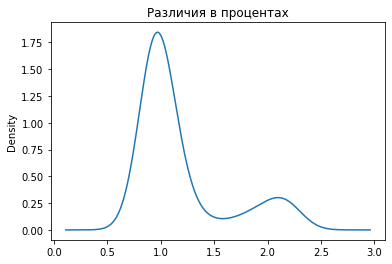

In [6]:
Sex_group = dfc.groupby(['Year', 'Sex']).sum()
Sex_group = Sex_group[['Amount']]
pivot_year = dfc.pivot_table('Amount', index='Year',
                             columns = 'Sex', aggfunc=sum)
pivot_year['delim'] = pivot_year['F'] / pivot_year['M']
pivot_year['delim'].plot(kind='kde', title = 'Различия в процентах')

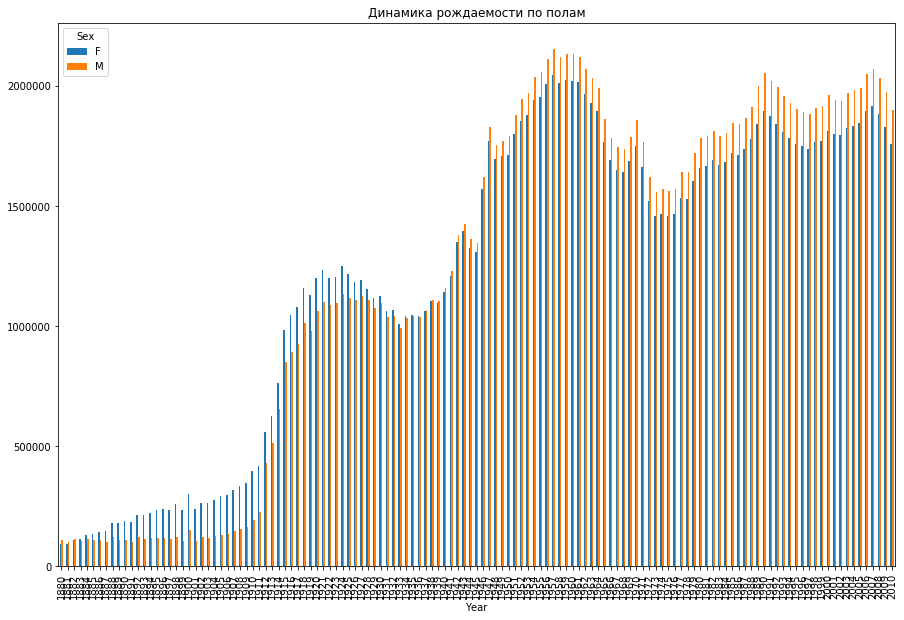

In [7]:
pivot_year[['F','M']].plot(kind = 'bar',figsize = (15,10), title = 'Динамика рождаемости по полам', legend=True, use_index=True)

# Задание №2: Найти самые популярные имена за всю историю.

In [15]:
#pivot_name = dfc.pivot_table('Amount',
#                             index='Year',
#                             columns = 'Name',
#                             aggfunc=sum)
#pivot_name.fillna(0)
#pivot_name = pivot_name.T
#pivot_name_correct = pivot_name.fillna(0)
#pivot_name_correct['Sum'] = pivot_name_correct.sum(axis=1)
#Main_data = pd.DataFrame(pivot_name_correct['Sum'])
#Main_data.sort_values(by = 'Sum',ascending = False,inplace = True)
#top_5_M = Main_data['Sum'].head()
#top_5_M.plot(kind = 'barh')

In [11]:
#df_top = df_top.groupby(['Name']).max()
#df_top = df_top.sort_values(['Amount'],ascending = False)

In [8]:
group = dfc.groupby(['Name','Year'])

In [9]:
max_data = group['Amount'].max()

In [20]:
dfm = pd.DataFrame(max_data)

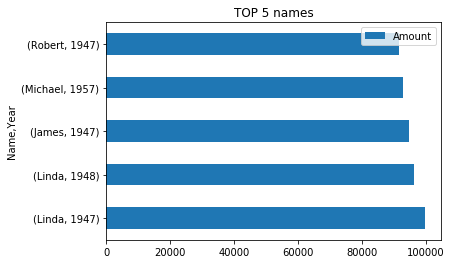

In [33]:
dfm.sort_values(['Amount'],ascending = False).head().plot(kind = 'barh',title='TOP 5 names')

# Задание№3 Разбейте весь временной промежуток в данных на 10 частей и для каждой найдите самое популярное имя каждого пола. Для каждого найденного имени визуализируйте его динамику за все время

In [51]:
year_interval = dfc['Year'].nunique() // 10
years = np.arange(1880, 2010, year_interval )
new_df = dfc.reset_index()
new_df['Year'] = pd.to_numeric(new_df['Year'])
new_df = new_df.loc[0:1690779]
#np.unique(new_df['Year']) #Все года есть 

In [52]:
date_index = np.repeat(years,169078)
new_df.sort_values(by='Year', ascending=True, inplace = True)
new_df['date_index'] = date_index

In [54]:
new_df.head()

,index,Name,Sex,Amount,Year,date_index
0,0,Mary,F,7065,1880,1880
1341,1341,Vern,M,19,1880,1880
1340,1340,Stewart,M,19,1880,1880
1339,1339,Randolph,M,19,1880,1880
1338,1338,Lucien,M,19,1880,1880


In [93]:
group_10 = new_df.groupby(['date_index'])

In [94]:
group_10['Amount'].max()

date_index
1880    67375
1893    73980
1906    99651
1919    92700
1932    85298
1945    68713
1958    65384
1971    41396
1984    32509
1997    24797
Name: Amount, dtype: int64

In [98]:
group_10_new = new_df.groupby(['date_index','Name']).agg({'Amount':'max'})

In [100]:
group_10_new

Amount
date_index Name              
1880       Aage             7
           Aagot            5
           Aarne            5
           Aaron          656
           Ab               8
           Abb              8
           Abbey            8
           Abbie          147
           Abbot            6
           Abbott          21
           Abby            17
           Abdon            8
           Abe            280
           Abel            91
           Abelardo        17
           Abelina          5
           Abelino          9
           Abell            5
           Aberdeen         7
           Abert            5
           Abie            13
           Abigail         41
           Able            12
           Abner           94
           Abney            5
           Abraham        790
           Abram           82
           Abran           15
           Abron           11
           Abundio          6
...                       ...
1997       Zyquavion        5
           Zyquavious      10
           Zyquez          11
           Zyra            24
           Zyrah           11
           Zyran            5
           Zyree            9
           Zyreion          5
           Zyrell          13
           Zyren           10
           Zyreon           7
           Zyrese           5
           Zyrhiana         6
           Zyria           38
           Zyriah          33
           Zyrian           5
           Zyriana          7
           Zyrianna         7
           Zyrie            5
           Zyriel           5
           Zyrihanna        9
           Zyrion          13
           Zyriyah          6
           Zyron           22
           Zyrus            9
           Zyshaun          7
           Zyshawn         14
           Zytavious        7
           Zyvion           5
           Zyyanna          6

[300189 rows x 1 columns]